# Práctica de Laboratorio 8 - Inteligencia Artificial 2025-1 Sección 1 EPISW-FISI
## Implementación de una red PMC-BP con Python y Numpy
### Prof. Rolando A. Maguiña Pérez

## Introducción
La Práctica Guiada de Laboratorio (PGL) 8 a realizarse el Jueves 05 de Junio del presente año, tratará sobre la red Perceptrón Multicapa con su algoritmo de aprendizaje llamado Backpropagation. Esta red se aplicará para resolver problemas genéricos de clasificación y de regresión.

Se desea abordar el problema de la aproximación de una función mediante una Perceptrón Multicapa-Backpropagation (PMC-BP). Inicialmente se presenta la implementación del algoritmo de entrenamiento de esta red (presentado en las sesiones de teoría), con el lenguaje `Python` y sus bibliotecas `Numpy` y `Matplotlib`. Posteriormente, **se propondrán algunos ejercicios cuyas soluciones se podrán obtener en grupos de hasta 4 alumnos**, y deberán enviarse para su respectiva revisión (ver sección 'Instrucciones para el envío' en este mismo cuaderno).  

Requiere: numpy, matplotlib

Nomenclatura:
- Z: número de instancias (muestras) en el conjunto de datos
- N: número de atributos o variables de entrada
- M: número de atributos o variables de salida
- t: vector de salidas esperadas o targets
- y: vector de salidas estimadas por la red.

### Paso previo
Importamos las bibliotecas de Python requeridas.

In [101]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset
El primer paso consiste en obtener el arreglo conteniendo los pares entrada-salida (instancias) a usar en el entrenamiento/validación de la red PMC-BP a implementar; dicho arreglo se denominará 'Dataset'. El tamaño de dicho arreglo es de $Z \times d$, donde $Z$ es el número de instancias (muestras) y $d$ es el número de características o atributos considerados para el problema abordado (incluye los atributos de entrada y los de salida).

In [102]:
Dataset = np.array([[0.00000, 0.00000], [1.00000, 0.84000], [2.00000, 0.91000], [3.00000, 0.14000],
[4.00000, -0.77000], [5.00000, -0.96000],[6.00000, -0.28000], [7.00000, 0.66000], [8.00000, 0.99000]])
Dataset

array([[ 0.  ,  0.  ],
       [ 1.  ,  0.84],
       [ 2.  ,  0.91],
       [ 3.  ,  0.14],
       [ 4.  , -0.77],
       [ 5.  , -0.96],
       [ 6.  , -0.28],
       [ 7.  ,  0.66],
       [ 8.  ,  0.99]])

In [103]:
Dataset.shape

(9, 2)

## Data para el entrenamiento/validación de la red
Como sabemos, a partir del dataset obtenido, se deben determinar los conjuntos de datos a emplear en el entrenamiento y en la validación de la red PMC-BP. Enseguida, se deben obtener dos arreglos: uno con los vectores de entrada a usar en el entrenamiento, y el segundo, con los respectivos vectores de salida. Análogamente, se deben determinar los arreglos con los vectores de entrada y de salida, a usar en la validación del entrenamiento. **Sin embargo, para el problema planteado, el dataset se usará tanto para el entrenamiento como para la validación**.

Separando los valores de entrada de los de salida.

In [104]:
X = Dataset[:,0]
t = Dataset[:,1]
X, t

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 array([ 0.  ,  0.84,  0.91,  0.14, -0.77, -0.96, -0.28,  0.66,  0.99]))

In [105]:
X.shape, t.shape

((9,), (9,))

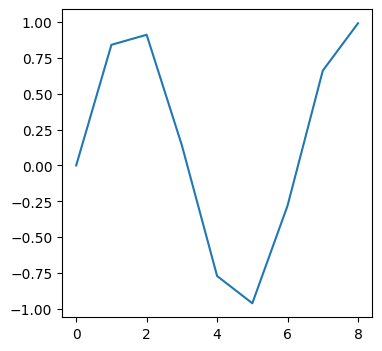

In [106]:
plt.figure(figsize=(4, 4))
plt.plot(X,t)

## Normalización de los datos
Antes de iniciar algún cálculo, sabemos que debemos tener en cuenta las diferencias que existen en las unidades de nuestros datos. Se requiere que los datos de nuestras variables estén en el mismo orden de magnitud, y en un buen número de casos es necesario normalizarlos; de esta manera nuestro modelo trabajará con unidades normalizadas. A pesar de lo indicado, incluso sabedores que hay varios procedimientos de normalización, en este caso, **no vamos a normalizar inicialmente nuestros datos**.

## Diseño de la red
Inicialmente se considera una topología de la red como la mostrada en la figura, vale decir, con 10 neuronas ocultas. Como función de activación de las neuronas ocultas se usará la logística sigmoidea y en las neuronas de salida, dado que se trata de un problema de aproximación de funciones, se usará una función lineal.

In [ ]:
from IPython.display import Image
i = Image(filename='D:\\Cursos\\Redes Neuronales\\2021-2\\arquit-red_aprox-fc_2021-2.png')
i

## Inicialización de los pesos y biases de la red
Según el algoritmo, los parámetros libres de la red se inicializan a valores aleatorios pequeños, los cuales pueden estar en el rangos: [-0.5,0.5] o [-1,1] o en torno de cero. A continuación se presenta el código para inicializarlos, aplicado al **problema planteado**.

In [107]:
# Implementación básica sin funciones
intervalo = 0.5
capa_entrada = 1
capa_oculta = 10
capa_salida = 1

w1 = np.random.uniform(-intervalo, intervalo, capa_oculta)

w2 = np.random.uniform(-intervalo, intervalo, capa_oculta)

In [108]:
w1, w2

(array([ 0.39200561,  0.38383045, -0.2399938 ,  0.21144574, -0.02639301,
         0.45291044, -0.28963087,  0.10128324,  0.3868592 ,  0.22146414]),
 array([ 0.44353722, -0.42064916, -0.24896485, -0.09773909,  0.13186035,
         0.24705392,  0.34147077, -0.21340051,  0.1061367 ,  0.4959227 ]))

### Definición de la función logística sigmoidea
Sabemos que la expresión matemática de la función logística sigmoidea `f(n)` es:

                         f(u) =  1/1 + exp(-u)

donde `u` es el vector de entradas netas. A partir de dicho parámetro, es posible calcular la función logistica sigmoidea; en la sgte celda se presenta el respectivo código.

In [109]:
# Funcion de activacion Logistica Sigmoidea para la unidad de salida
def logistica(u):
    return 1/(1 + np.exp(-u))

Supongamos que se desea aplicar esta función al arreglo 'a'.

In [110]:
a = np.array([[0, 0.6, -0.8]])
a

array([[ 0. ,  0.6, -0.8]])

In [111]:
logistica(a)

array([[0.5       , 0.64565631, 0.31002552]])

A continuación se presenta la implementación de la derivada de la función logística sigmoidea:

In [112]:
def deriv_logistica(x):
    return x * (1.0 - x)

In [113]:
deriv_logistica(-1.76)

-4.8576

## Implementación
Luego de haber determinado la topología de la red neuronal, la implementaremos en el lenguaje de programación `Python` con la ayuda de su biblioteca `Numpy`. Enseguida, se efectuarán las sgtes actividades:

- Construiremos el algoritmo de aprendizaje de nuestra red PMC, Backpropagation, mediante la función `train()`. Dentro de ella se instancian constantes y variables importantes como globales, de modo que estos valores sean accesibles para toda la función.
- Aplicaremos dicho algoritmo de aprendizaje para resolver el problema de aproximación de una función planteado; para tal efecto, se usará el conjunto de datos disponible.

En las sgtes celdas se presentan las líneas de código correspondientes.

In [ ]:
import numpy as np

In [114]:
Dataset = np.array([[0.00000, 0.00000], [1.00000, 0.84000], [2.00000, 0.91000], [3.00000, 0.14000],
[4.00000, -0.77000], [5.00000, -0.96000],[6.00000, -0.28000], [7.00000, 0.66000], [8.00000, 0.99000]])

In [115]:
X = Dataset[:,0]
t = Dataset[:,1]
X, t

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 array([ 0.  ,  0.84,  0.91,  0.14, -0.77, -0.96, -0.28,  0.66,  0.99]))

In [116]:
def train(X, t, learning_rate=0.2, epochs=50):
    global input_num
    global hidden_num
    global w1
    global w2

    input_num = 1
    hidden_num = 10
    output_num = 1
    intervalo = 0.5

    # inicializando los pesos
    w1 = np.random.uniform(-intervalo, intervalo, hidden_num)

    w2 = np.random.uniform(-intervalo, intervalo, hidden_num)

    for epoch in range(epochs):
        gradient_out = 0.0                 # gradientes para la capa de salida y la capa oculta
        gradient_hidden = []

        for i in range(X.shape[0]):
        # propagacion hacia adelante
            x = X[i]

            u1 = x * w1
            o = logistica(u1)
            u2 = o.dot(w2)
            y = u2

        # backpropagation
            delta_hidden_s = []           # inicializamos los delta_j a lista vacía
            gradient_hidden_s = []       # inicializamos los gradientes de neurs ocultas a lista vacía

            delta_out_s = t[i] - y     # cálculo del único delta_k (f'(u) = 1 pq fc de activ es lineal)
            gradient_out_s = delta_out_s * o     # error por la salida de la capa anterior

            for j in range(hidden_num):

                delta_hidden_s.append(deriv_logistica(u1[j]) * w2[j] * delta_out_s)
                gradient_hidden_s.append(delta_hidden_s[j] * x)


            gradient_out = gradient_out + gradient_out_s
            gradient_hidden = gradient_hidden + gradient_hidden_s


        print("\n#", epoch, "Gradient out: ",gradient_out),
        print("\n     Weights  out: ", w1, w2)

        # Ahora actualizando pesos
        w2 = w2 + learning_rate * gradient_out

        for j in range(hidden_num):
            w1[j] = w1[j] + learning_rate * gradient_hidden[j]

In [117]:
train(X, t)


# 0 Gradient out:  [1.3996968  2.55724446 1.02124993 2.32963589 0.78678809 1.13467017
 1.75206405 0.71479298 1.50880204 2.48015012]

     Weights  out:  [-0.06380257  0.38100446 -0.18855889  0.22240988 -0.31967213 -0.14535517
  0.03015144 -0.38475415 -0.03409506  0.31297369] [-0.26711408 -0.34853556  0.21629445 -0.47900125 -0.13975495  0.0075435
  0.1058368   0.35290739  0.09299243  0.41667388]

# 1 Gradient out:  [-5.49689363 -9.96871684 -4.09709487 -8.81755575 -3.00367812 -4.54662555
 -6.67739427 -2.60355617 -5.86612574 -9.54320141]

     Weights  out:  [-0.06380257  0.38100446 -0.18855889  0.22240988 -0.31967213 -0.14535517
  0.03015144 -0.38475415 -0.03409506  0.31297369] [ 0.01282528  0.16291334  0.42054443 -0.01307407  0.01760267  0.23447754
  0.45624961  0.49586599  0.39475283  0.9127039 ]

# 2 Gradient out:  [21.13854844 38.40032122 15.67317338 34.22772583 11.6395817  17.39705714
 25.8756686  10.21663446 22.61594006 36.88503237]

     Weights  out:  [-0.06380257  0.38100446 -0

## Ejercicios
### Ejercicio A  (3 puntos)
1. Obtenga, a partir del código presentado para el entrenamiento de la PMC-BP, el algoritmo de recuerdo de la red.
2. Aplique ahora dicho algoritmo de recuerdo en la etapa denominada *Validación* para el mismo problema de regresión. Determine el error cuadrático de la red en cada época y grafique sus resultados.

### Ejercicio B  (5 puntos)
1. Use la función tangente hiperbólica en lugar de la lineal en la capa de salida para abordar el mismo problema. Con ese objetivo defina la(s) función(nes) que se requieran e insértelas en el código de modo que la red funcione correctamente. Mantenga inalterada la arquitectura de la red.
2. A partir de las modificaciones pedidas, entrene nuevamente la red al mismo problema de regresión. Enseguida aplique el algoritmo de recuerdo.
3. Compare los resultados que obtenga con los obtenidos con la red PMC-BP que usaba una función lineal en la salida.

### Ejercicio C (4 puntos)
1. Modifique la arquitectura de la red PMC usando ahora 4, 6, 8 y 12 neuronas en la capa oculta. Aplique las etapas de entrenamiento/validación de la red.
2. Determine el mejor modelo, indicando específicamente con cuántas neuronas ocultas obtuvo la mejor respuesta de la red.

### Ejercicio D (8 puntos)
1. Modifique la arquitectura de la red PMC usando ahora **dos capas ocultas**, inicialmente con 10 neuronas en la primera capa oculta y 8 neuronas en la segunda capa oculta. Use diferentes números de neuronas en las capas ocultas. Aplique las etapas de entrenamiento/validación de la red para cada combinación.
2. Determine con qué combinación de neuronas en las capas ocultas obtuvo el mejor modelo, el que produjo la mejor respuesta de la red.


## Instrucciones para el envío de la solución
La solución de la "Práctica de Laboratorio 8 IA 2025-1 EPISW" deberá enviarse al correo electrónico rmaguinacursos@gmail.com, hasta las 23:59 h del Domingo 08 de Junio del 2025 en un cuaderno computacional interactivo (archivo con extensión .ipynb).

El documento deberá tener las sgtes características:
- Nombre del archivo: solPGL8_IA_2025-1_EPISW_nombre-apellidos_integrantes.ipynb.
- Todas las preguntas de la Práctica deben responderse en el mismo cci (**Sugerencia**: obtener una copia de este documento y desarrollar en ellas las respectivas soluciones); la solución a cada pregunta debe registrarse en una celda debajo del planteamiento de la misma, mencionando explícitamente como subtítulo: \"Solución del ejercicio n\", donde \"n\" corresponde al número del ejercicio."


### Solución del ejercicio A

1. Obtenga, a partir del código presentado para el entrenamiento de la PMC-BP, el algoritmo de recuerdo de la red.

In [118]:
# Función auxiliar necesaria
def logistica(u):
    return 1/(1 + np.exp(-u))

# Extraído de la fase de propagación hacia adelante del código de entrenamiento.
def recall(x, w1, w2):
    # Capa oculta
    u1 = x * w1        # Entrada neta de las neuronas ocultas
    o = logistica(u1)  # (función sigmoidea)
    
    # Capa de salida
    u2 = o.dot(w2)     # Entrada neta de la neurona de salida
    y = u2             # Salida final (función lineal)
    
    return y

2. Aplique ahora dicho algoritmo de recuerdo en la etapa denominada Validación para el mismo problema de regresión. Determine el error cuadrático de la red en cada época y grafique sus resultados.

In [119]:
# FUNCIÓN DE ENTRENAMIENTO MODIFICADA PARA INCLUIR VALIDACIÓN

def train_with_validation(X, t, learning_rate=0.2, epochs=50):
    # Variables globales
    input_num = 1
    hidden_num = 10
    output_num = 1
    intervalo = 0.5

    # Inicializando los pesos
    w1 = np.random.uniform(-intervalo, intervalo, hidden_num)
    w2 = np.random.uniform(-intervalo, intervalo, hidden_num)
    
    validation_errors = []

    print("APLICACIÓN DEL ALGORITMO DE RECUERDO EN VALIDACIÓN")
    print("=" * 60)
    print("Época\t\tError Cuadrático de Validación")
    print("-" * 40)

    for epoch in range(epochs):
        # FASE DE ENTRENAMIENTO
        gradient_out = 0.0
        gradient_hidden = np.zeros(hidden_num)

        for i in range(X.shape[0]):
            # Propagación hacia adelante
            x = X[i]
            u1 = x * w1
            o = logistica(u1)
            u2 = o.dot(w2)
            y = u2

            # Backpropagation
            delta_hidden_s = []
            gradient_hidden_s = []

            delta_out_s = t[i] - y
            gradient_out_s = delta_out_s * o

            for j in range(hidden_num):
                delta_hidden_s.append(deriv_logistica(o[j]) * w2[j] * delta_out_s)
                gradient_hidden_s.append(delta_hidden_s[j] * x)

            gradient_out = gradient_out + gradient_out_s
            gradient_hidden = gradient_hidden + np.array(gradient_hidden_s)

        # Actualizar pesos
        w2 = w2 + learning_rate * gradient_out
        for j in range(hidden_num):
            w1[j] = w1[j] + learning_rate * gradient_hidden[j]

        # FASE DE VALIDACIÓN - APLICACIÓN DEL ALGORITMO DE RECUERDO
        
        total_squared_error = 0.0
        
        for i in range(X.shape[0]):
            # Aplicar algoritmo de recuerdo para obtener predicción
            y_pred = recall(X[i], w1, w2)
            
            # Calcular error cuadrático para esta muestra
            squared_error = (t[i] - y_pred)**2
            total_squared_error += squared_error
        
        # Error cuadrático medio de la época
        mse_validation = total_squared_error / X.shape[0]
        validation_errors.append(mse_validation)
        
        # Mostrar progreso
        print(f"{epoch}\t\t{mse_validation:.8f}")

    print("-" * 40)
    print(f"Error final: {validation_errors[-1]:.8f}")
    
    return validation_errors, w1, w2

#### EJECUTAMOS ENTRENAMIENTO CON VALIDACIÓN

In [120]:
validation_errors, final_w1, final_w2 = train_with_validation(X, t, learning_rate=0.2, epochs=50)

APLICACIÓN DEL ALGORITMO DE RECUERDO EN VALIDACIÓN
Época		Error Cuadrático de Validación
----------------------------------------
0		5.54722614
1		10.23585532
2		0.70177878
3		0.45483170
4		0.40520703
5		0.39395510
6		0.39033068
7		0.38838757
8		0.38695564
9		0.38577897
10		0.38477913
11		0.38391603
12		0.38316157
13		0.38249415
14		0.38189703
15		0.38135727
16		0.38086494
17		0.38041239
18		0.37999374
19		0.37960441
20		0.37924077
21		0.37889996
22		0.37857963
23		0.37827786
24		0.37799303
25		0.37772375
26		0.37746883
27		0.37722721
28		0.37699796
29		0.37678021
30		0.37657321
31		0.37637624
32		0.37618864
33		0.37600982
34		0.37583920
35		0.37567625
36		0.37552049
37		0.37537145
38		0.37522871
39		0.37509186
40		0.37496052
41		0.37483435
42		0.37471302
43		0.37459623
44		0.37448369
45		0.37437514
46		0.37427034
47		0.37416907
48		0.37407111
49		0.37397627
----------------------------------------
Error final: 0.37397627


#### GRAFICAMOS LOS RESULTADOS

In [121]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

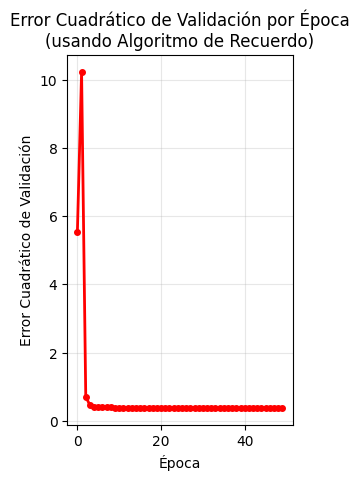

In [122]:
# Gráfico 1: Evolución del error cuadrático en validación
plt.subplot(1, 2, 1)
epochs_range = range(len(validation_errors))
plt.plot(epochs_range, validation_errors, 'r-', linewidth=2, marker='o', markersize=4)
plt.xlabel('Época')
plt.ylabel('Error Cuadrático de Validación')
plt.title('Error Cuadrático de Validación por Época\n(usando Algoritmo de Recuerdo)')
plt.grid(True, alpha=0.3)

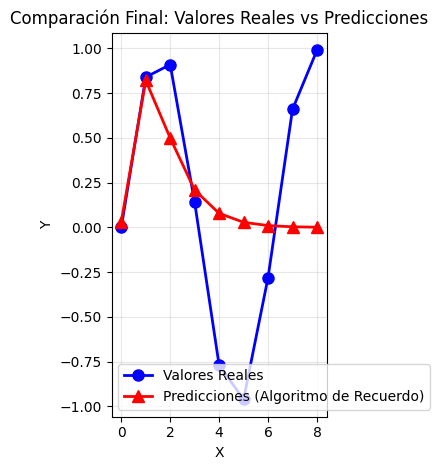


Error cuadrático final de validación: 0.37397627


In [123]:
# Gráfico 2: Predicciones finales vs valores reales
plt.subplot(1, 2, 2)
y_predictions = []
for i in range(X.shape[0]):
    y_pred = recall(X[i], final_w1, final_w2)
    y_predictions.append(y_pred)

plt.plot(X, t, 'bo-', label='Valores Reales', markersize=8, linewidth=2)
plt.plot(X, y_predictions, 'r^-', label='Predicciones (Algoritmo de Recuerdo)', markersize=8, linewidth=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparación Final: Valores Reales vs Predicciones')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nError cuadrático final de validación: {validation_errors[-1]:.8f}")

### Solución del ejercicio B

Algoritmo de entramiento con tanh como función de activación de salida

In [124]:
def deriv_tanh(u):
    return 1 - np.tanh(u) ** 2

def train_tanh(X, t, learning_rate=0.2, epochs=50):
    global input_num
    global hidden_num
    global w1
    global w2

    input_num = 1
    hidden_num = 10
    output_num = 1
    intervalo = 0.5

    # inicializando los pesos
    w1 = np.random.uniform(-intervalo, intervalo, hidden_num)

    w2 = np.random.uniform(-intervalo, intervalo, hidden_num)

    for epoch in range(epochs):
        gradient_out = 0.0                 
        gradient_hidden = []

        for i in range(X.shape[0]):
        # propagacion hacia adelante
            x = X[i]

            u1 = x * w1
            o = logistica(u1)
            u2 = o.dot(w2)
            y = np.tanh(u2)  #Función de activación tanh para la salida

        # backpropagation
            delta_hidden_s = []           
            gradient_hidden_s = []       

            delta_out_s = (t[i] - y)* deriv_tanh(u2)     
            gradient_out_s = delta_out_s * o     

            for j in range(hidden_num):

                delta_hidden_s.append(deriv_logistica(u1[j]) * w2[j] * delta_out_s)
                gradient_hidden_s.append(delta_hidden_s[j] * x)


            gradient_out = gradient_out + gradient_out_s
            gradient_hidden = gradient_hidden + gradient_hidden_s


        print("\n#", epoch, "Gradient out: ",gradient_out),
        print("\n     Weights  out: ", w1, w2)

        # Ahora actualizando pesos
        w2 = w2 + learning_rate * gradient_out

        for j in range(hidden_num):
            w1[j] = w1[j] + learning_rate * gradient_hidden[j]

def recall_tanh(X, t):
    predictions = []
    for i in range(X.shape[0]):
        x = X[i]
        u1 = x * w1
        o = logistica(u1)
        u2 = o.dot(w2)
        y = np.tanh(u2)  # Activación en salida
        predictions.append(y)

    predictions = np.array(predictions)
    mse = np.mean((predictions - t)**2)
    print("\nTanh error cuadrático medio (ECM):", mse)

    return predictions, mse

def recall(X, t):
    predictions = []
    for i in range(X.shape[0]):
        x = X[i]
        u1 = x * w1
        o = logistica(u1)
        u2 = o.dot(w2)
        y = u2  # salida lineal
        predictions.append(y)

    predictions = np.array(predictions)
    mse = np.mean((predictions - t)**2)
    print("\nLineal error cuadrático medio (ECM):", mse)

    return predictions, mse

Hallando por cada algoritmo el promedio de sus MSE de 10 entrenamientos.

In [125]:
import numpy as np

errors_linear = []
errors_tanh = []

for _ in range(10):
    train(X, t)
    _, mse_lin = recall(X, t)
    errors_linear.append(mse_lin)

    train_tanh(X, t)
    _, mse_tanh = recall_tanh(X, t)
    errors_tanh.append(mse_tanh)

print("Promedio MSE salida lineal:", np.mean(errors_linear), "±", np.std(errors_linear))
print("Promedio MSE salida tanh:", np.mean(errors_tanh), "±", np.std(errors_tanh))



# 0 Gradient out:  [-5.60318485 -6.71306187 -2.18988799 -5.68605429 -5.6859973  -2.06858119
 -4.92115463 -6.58155064 -2.0620782  -5.31493186]

     Weights  out:  [ 0.22581081  0.49178763 -0.20376756  0.23933421  0.23932473 -0.22253183
  0.12918775  0.44344556 -0.22356515  0.18227382] [ 0.27032809 -0.10567065  0.14777945  0.40380732  0.16156904 -0.25173847
  0.23200716  0.45736501 -0.06913792  0.08558164]

# 1 Gradient out:  [34.60474058 40.5737469  14.84222234 35.05940565 35.05909385 14.17097542
 30.76455577 39.8600666  14.1351512  33.00273388]

     Weights  out:  [ 0.22581081  0.49178763 -0.20376756  0.23933421  0.23932473 -0.22253183
  0.12918775  0.44344556 -0.22356515  0.18227382] [-0.85030888 -1.44828302 -0.29019815 -0.73340354 -0.97563042 -0.66545471
 -0.75222377 -0.85894512 -0.48155356 -0.97740474]

# 2 Gradient out:  [-213.79669918 -251.53416467  -90.58784487 -216.65925372 -216.6572896
  -86.36846084 -189.73492533 -247.0260108   -86.1430859  -203.73481758]

     Weights  out

Se observa que el Error Cuadrático Medio (MSE) obtenido con activación lineal en la capa de salida es consistentemente más alto, con un promedio cercano a 1.422. En contraste, al emplear la función tangente hiperbólica (tanh) como activación de salida, el modelo logra un MSE promedio de aproximadamente 0.794.

Este resultado sugiere que la red con activación tanh en la salida ofrece un mejor desempeño predictivo, al adaptarse más eficazmente a la distribución del conjunto de datos.
La función tanh, al ser no lineal y acotada en [-1, 1], proporciona una salida más adecuada para problemas donde las variables objetivo también están dentro de ese rango, favoreciendo una mejor aproximación a la función real y facilitando la convergencia del modelo.



### Solución de problema C

1. Modifique la arquitectura de la red PMC usando ahora 4, 6, 8 y 12 neuronas en la capa oculta. Aplique las etapas de entrenamiento/validación de la red.
2. Determine el mejor modelo, indicando específicamente con cuántas neuronas ocultas obtuvo la mejor respuesta de la red.

In [126]:
import numpy as np
import matplotlib.pyplot as plt

Dataset = np.array([[0.00000, 0.00000], [1.00000, 0.84000], [2.00000, 0.91000], [3.00000, 0.14000],
[4.00000, -0.77000], [5.00000, -0.96000],[6.00000, -0.28000], [7.00000, 0.66000], [8.00000, 0.99000]])

X = Dataset[:,0]
t = Dataset[:,1]

def logistica(u):
    return 1/(1 + np.exp(-u))

def deriv_logistica(x):
    return x * (1.0 - x)

def train_modified(X, t, hidden_num, learning_rate=0.2, epochs=50):
    input_num = 1
    output_num = 1
    intervalo = 0.5

    w1 = np.random.uniform(-intervalo, intervalo, hidden_num)
    w2 = np.random.uniform(-intervalo, intervalo, hidden_num)

    mse_history = []

    for epoch in range(epochs):
        gradient_out = 0.0
        gradient_hidden = np.zeros(hidden_num)

        for i in range(X.shape[0]):
            x = X[i]

            u1 = x * w1
            o = logistica(u1)
            u2 = o.dot(w2)
            y = u2

            delta_hidden_s = []
            gradient_hidden_s = []

            delta_out_s = t[i] - y
            gradient_out_s = delta_out_s * o

            for j in range(hidden_num):
                delta_hidden_s.append(deriv_logistica(o[j]) * w2[j] * delta_out_s)
                gradient_hidden_s.append(delta_hidden_s[j] * x)

            gradient_out = gradient_out + gradient_out_s
            gradient_hidden = gradient_hidden + np.array(gradient_hidden_s)

        w2 = w2 + learning_rate * gradient_out
        for j in range(hidden_num):
            w1[j] = w1[j] + learning_rate * gradient_hidden[j]
        
        mse = calculate_mse(X, t, w1, w2)
        mse_history.append(mse)

    return w1, w2, mse_history

def calculate_mse(X, t, w1, w2):
    total_error = 0.0
    for i in range(X.shape[0]):
        x = X[i]
        u1 = x * w1
        o = logistica(u1)
        u2 = o.dot(w2)
        y = u2
        error = (t[i] - y)**2
        total_error += error
    return total_error / X.shape[0]

def recall_network(X, w1, w2):
    predictions = []
    for i in range(X.shape[0]):
        x = X[i]
        u1 = x * w1
        o = logistica(u1)
        u2 = o.dot(w2)
        y = u2
        predictions.append(y)
    return np.array(predictions)

hidden_neurons = [4, 6, 8, 12]
results = []

print("Resultados de entrenamiento y validación:")
print("=" * 50)

for neurons in hidden_neurons:
    w1, w2, mse_history = train_modified(X, t, neurons, learning_rate=0.2, epochs=50)
    
    final_mse = mse_history[-1]
    predictions = recall_network(X, w1, w2)
    
    results.append({
        'neuronas': neurons,
        'mse_final': final_mse,
        'mse_history': mse_history,
        'predictions': predictions,
        'w1': w1,
        'w2': w2
    })
    
    print(f"Neuronas: {neurons}")
    print(f"  MSE Final: {final_mse:.6f}")
    print("-" * 30)

best_model = min(results, key=lambda x: x['mse_final'])
print(f"\nMejor modelo:")
print(f"Neuronas ocultas: {best_model['neuronas']}")
print(f"MSE: {best_model['mse_final']:.6f}")



print("\nComparación de resultados:")
print("=" * 40)
print("Neuronas\tMSE Final")
print("-" * 25)
for result in results:
    print(f"{result['neuronas']}\t\t{result['mse_final']:.6f}")

print(f"\nEl mejor modelo tiene {best_model['neuronas']} neuronas ocultas con MSE de {best_model['mse_final']:.6f}")

Resultados de entrenamiento y validación:
Neuronas: 4
  MSE Final: 0.481860
------------------------------
Neuronas: 6
  MSE Final: 0.426074
------------------------------
Neuronas: 8
  MSE Final: 0.462260
------------------------------
Neuronas: 12
  MSE Final: 0.375825
------------------------------

Mejor modelo:
Neuronas ocultas: 12
MSE: 0.375825

Comparación de resultados:
Neuronas	MSE Final
-------------------------
4		0.481860
6		0.426074
8		0.462260
12		0.375825

El mejor modelo tiene 12 neuronas ocultas con MSE de 0.375825


### Solución de problema D

1. Modifique la arquitectura de la red PMC usando ahora **dos capas ocultas**, inicialmente con 10 neuronas en la primera capa oculta y 8 neuronas en la segunda capa oculta. Use diferentes números de neuronas en las capas ocultas. Aplique las etapas de entrenamiento/validación de la red para cada combinación.


In [127]:
import numpy as np

Dataset = np.array([[0.00000, 0.00000], [1.00000, 0.84000], [2.00000, 0.91000], [3.00000, 0.14000],
[4.00000, -0.77000], [5.00000, -0.96000],[6.00000, -0.28000], [7.00000, 0.66000], [8.00000, 0.99000]])

X = Dataset[:, 0:1]
t = Dataset[:,1]
X, t

def logistica(u):
    return 1/(1 + np.exp(-u))

def deriv_logistica(x):
    return x * (1.0 - x)


def train_with_two_layers(X, t, hidden_num1=10, hidden_num2=8, learning_rate=0.2, epochs=50):
    input_num = X.shape[1]  
    output_num = 1
    intervalo = 0.5

    # Inicializando pesos con shapes apropiadas
    w1 = np.random.uniform(-intervalo, intervalo, (input_num, hidden_num1))   
    w2 = np.random.uniform(-intervalo, intervalo, (hidden_num1, hidden_num2))
    w3 = np.random.uniform(-intervalo, intervalo, (hidden_num2, output_num))  

    for epoch in range(epochs):
        error_total = 0
        grad_w1 = np.zeros_like(w1)
        grad_w2 = np.zeros_like(w2)
        grad_w3 = np.zeros_like(w3)

        for i in range(X.shape[0]):
            x = X[i].reshape(1, -1)       
            target = t[i]

            # Forward pass
            z1 = np.dot(x, w1)            
            o1 = logistica(z1)             
            z2 = np.dot(o1, w2)           
            o2 = logistica(z2)            
            z3 = np.dot(o2, w3)           
            y = z3[0, 0]                  

            # Error
            error = target - y
            error_total += error**2

            # Backpropagation
            delta3 = error
            grad_w3 += (o2.T * delta3)                   
            delta2 = deriv_logistica(o2) * (delta3 * w3.T) 
            grad_w2 += np.dot(o1.T, delta2)                
            delta1 = deriv_logistica(o1) * np.dot(delta2, w2.T)  
            grad_w1 += np.dot(x.T, delta1)                

        # Actualizar pesos
        w1 += learning_rate * grad_w1
        w2 += learning_rate * grad_w2
        w3 += learning_rate * grad_w3

    mse_final = error_total / X.shape[0]
    return w1, w2, w3, mse_final



def predict_network(X_test, w1, w2, w3):
    predictions = []
    for x in X_test:
        x = x.reshape(1, -1)
        z1 = np.dot(x, w1)
        o1 = logistica(z1)
        z2 = np.dot(o1, w2)
        o2 = logistica(z2)
        z3 = np.dot(o2, w3)
        y = z3[0, 0]
        predictions.append(y)
    return np.array(predictions)




def evaluate_configuration(hidden1, hidden2):

    w1, w2, w3, mse_train = train_with_two_layers(X, t, hidden1, hidden2)
    predictions = predict_network(X, w1, w2, w3)
    mse = np.mean((t - predictions) ** 2)
    
    ss_res = np.sum((t - predictions) ** 2)
    ss_tot = np.sum((t - np.mean(t)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    return mse, r2, predictions


In [128]:
mse_inicial, r2_inicial, pred_inicial = evaluate_configuration(10, 8)
print(f"   MSE: {mse_inicial:.6f}")
print(f"   R²:  {r2_inicial:.6f}")

   MSE: 0.506030
   R²:  -0.058690


2. Determine con qué combinación de neuronas en las capas ocultas obtuvo el mejor modelo, el que produjo la mejor respuesta de la red.

In [129]:
configurations = [
    (10, 8),   
    (8, 6),    
    (12, 10),  
    (15, 5),   
    (5, 15),   
    (20, 3),   
    (6, 12),   
    (8, 8),    
    (14, 7),  
    (9, 9),    
    (16, 4),   
    (7, 14)    
]

print("Configuración (H1, H2) | MSE        | R²")
print("-" * 45)

results = []
for hidden1, hidden2 in configurations:
    mse_inicial, r2_inicial, pred_inicial = evaluate_configuration(hidden1, hidden2)
    results.append({
        'config': (hidden1, hidden2),
        'mse': mse_inicial,
        'r2': r2_inicial,
        'predictions': pred_inicial,
    })
    print(f"({hidden1:2d}, {hidden2:2d})              | {mse_inicial:.6f} | {r2_inicial:.6f}")

best_result = min(results, key=lambda x: x['mse'])
print(f"\nBest: {best_result}")

Configuración (H1, H2) | MSE        | R²
---------------------------------------------
(10,  8)              | 0.478701 | -0.001512
( 8,  6)              | 0.468643 | 0.019529
(12, 10)              | 0.507578 | -0.061928
(15,  5)              | 0.464937 | 0.027284
( 5, 15)              | 0.545100 | -0.140429
(20,  3)              | 0.474965 | 0.006304
( 6, 12)              | 0.477735 | 0.000508
( 8,  8)              | 0.526700 | -0.101935
(14,  7)              | 0.467416 | 0.022097
( 9,  9)              | 0.506920 | -0.060552
(16,  4)              | 0.469940 | 0.016817
( 7, 14)              | 0.506878 | -0.060462

Best: {'config': (15, 5), 'mse': np.float64(0.46493669536636084), 'r2': np.float64(0.027283867614196988), 'predictions': array([0.34139717, 0.27120941, 0.21246285, 0.16877155, 0.1387579 ,
       0.11909981, 0.10660484, 0.09887149, 0.09426355])}
